In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

plt.style.use('ggplot')

### `Q-1:` Using Gapminder Data
1. Create a scatter plot of 'gdpPercap' against 'lifeExp' for the year 2007, with the size of the markers determined by 'pop' and the color determined by 'continent'.

In [3]:
gapminder = px.data.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [4]:
temp_df = gapminder[gapminder['year'] == 2007]

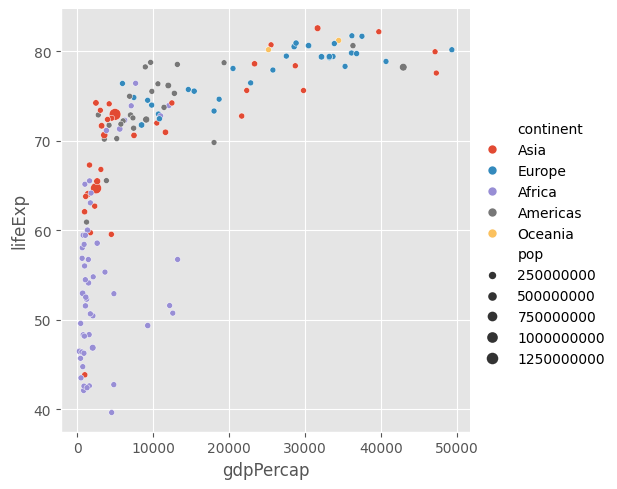

In [5]:
sns.relplot(kind='scatter', data=temp_df, x = 'gdpPercap', y = 'lifeExp', size='pop', hue = 'continent')

plt.show()

### `Q-2-3:` Using `flights` dataset of seaborn.

2. Using the "flights" dataset that comes with seaborn, create a heatmap that shows the average number of passengers per month for each year.

3. Using the seaborn's flight dataset, create a clustermap to visualize the relationship between the number of passengers, months, and year.


In [6]:
flight = sns.load_dataset('flights')
flight

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [7]:
temp_df = flight.pivot(index='month', columns='year', values='passengers')
temp_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


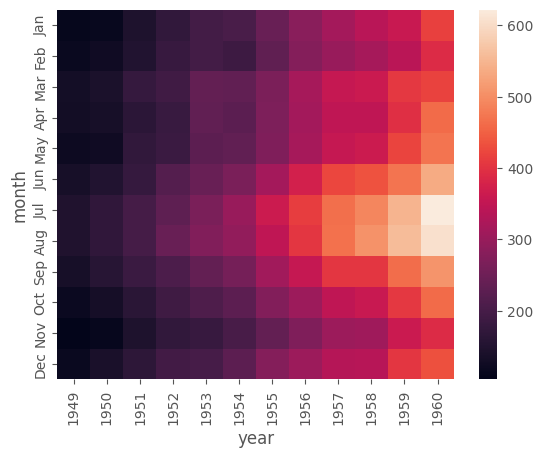

In [8]:
# Question 2
sns.heatmap(data=temp_df)
plt.show()

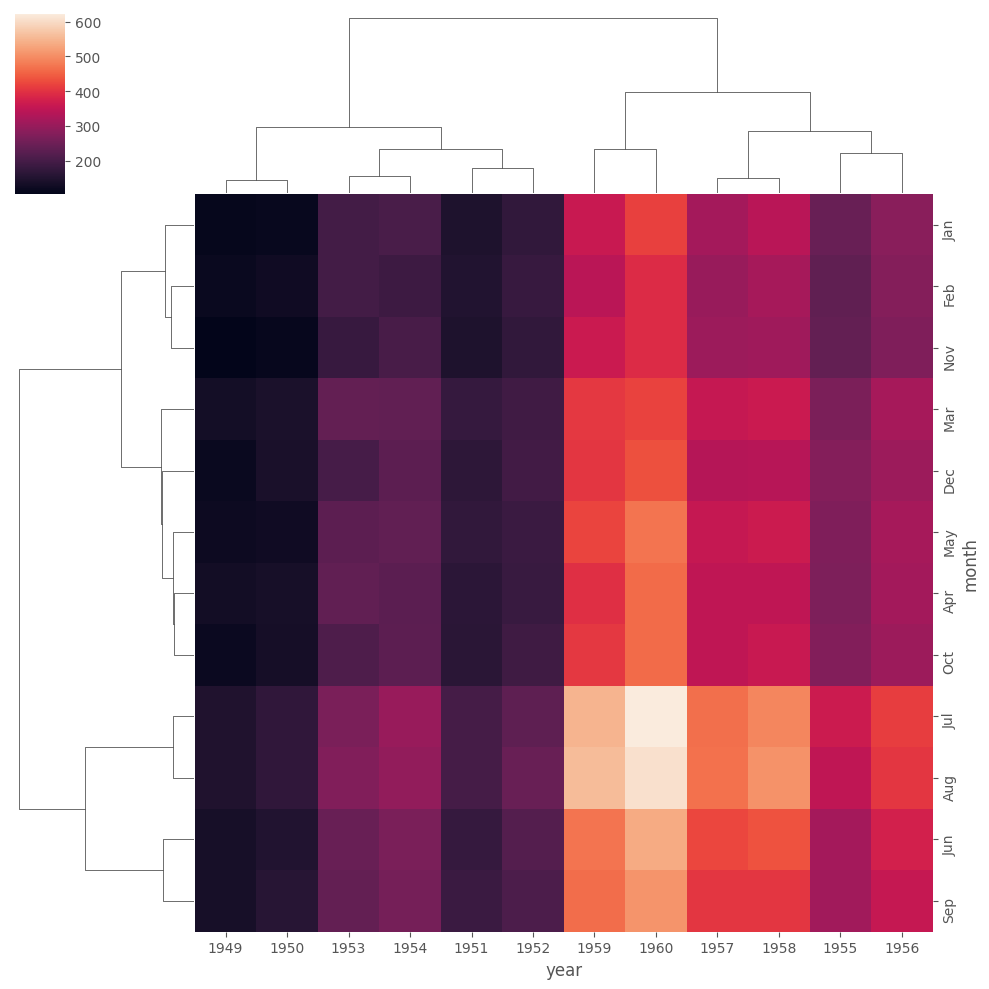

In [9]:
# Question 3
sns.clustermap(data=temp_df)
plt.show()

## For questions 4-8:

For these qestions, an insurance dataset is used. You can get details from [here](https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health). And if you want this dataset to use directly, then you can use this link: **https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv**

In [10]:
patient = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv')
patient.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


### **`Q-4:`** Draw a scatter plot based on the below conditions:
1. x-axis should be "age" and y-axis should be "bmi".
2. For hue, size and style parameters use "diabetic", "gender" and "smoker" column respectively.
3. Add title to your chart.
4. Age should be less than 70 percentiles.
5. BMI should be greater than the average value of the filtered age dataset.

In [11]:
temp_df = patient[patient['age'] > patient['age'].quantile(0.75)]
temp_df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
18,18,19,49.0,male,35.4,97,Yes,0,No,southwest,1263.25
19,19,20,48.0,male,33.3,91,Yes,0,No,southeast,1391.53
24,24,25,50.0,female,20.8,85,Yes,0,No,southeast,1607.51
28,28,29,58.0,female,31.1,87,No,0,No,southeast,1621.88
31,31,32,49.0,male,21.8,80,No,0,No,northwest,1627.28
...,...,...,...,...,...,...,...,...,...,...,...
1323,1323,1324,49.0,female,33.8,107,No,1,Yes,southwest,47928.03
1325,1325,1326,52.0,female,36.4,133,Yes,1,Yes,northeast,48517.56
1327,1327,1328,49.0,male,40.9,107,No,0,Yes,southeast,48673.56
1329,1329,1330,52.0,female,37.7,109,Yes,0,Yes,southwest,48824.45


In [12]:
temp_df = temp_df[temp_df['bmi'] > temp_df['bmi'].mean()]
temp_df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
18,18,19,49.0,male,35.4,97,Yes,0,No,southwest,1263.25
19,19,20,48.0,male,33.3,91,Yes,0,No,southeast,1391.53
28,28,29,58.0,female,31.1,87,No,0,No,southeast,1621.88
33,33,34,52.0,female,36.9,81,No,0,No,southeast,1629.83
39,39,40,49.0,female,39.8,100,Yes,0,No,southeast,1633.96
...,...,...,...,...,...,...,...,...,...,...,...
1323,1323,1324,49.0,female,33.8,107,No,1,Yes,southwest,47928.03
1325,1325,1326,52.0,female,36.4,133,Yes,1,Yes,northeast,48517.56
1327,1327,1328,49.0,male,40.9,107,No,0,Yes,southeast,48673.56
1329,1329,1330,52.0,female,37.7,109,Yes,0,Yes,southwest,48824.45


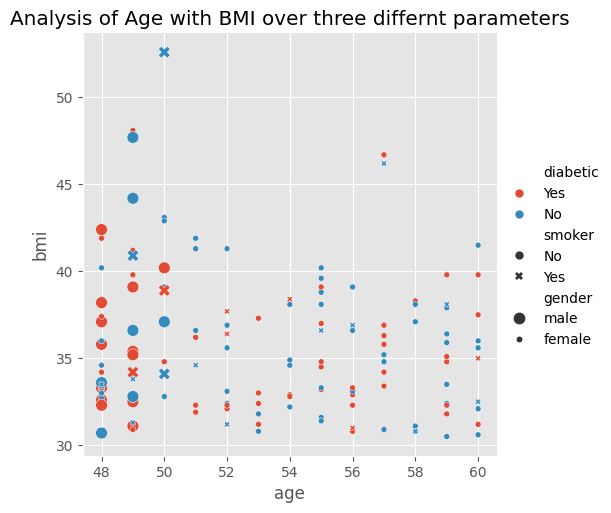

In [13]:
sns.relplot(kind='scatter', data=temp_df, x = 'age', y = 'bmi', hue='diabetic', size='gender', style = 'smoker')

plt.title('Analysis of Age with BMI over three differnt parameters')

plt.show()

### **`Q-5:`** Draw a line plot by using the below informations

1. bloodpressure vs children
2. Blood-pressure values should be between 90 and 100. The upper and lower limit are included.
3. Show the details of "smoker".

In [19]:
patient.sample(5)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1170,1170,1171,27.0,female,41.4,95,No,1,No,northwest,28476.73
156,156,157,33.0,female,17.4,87,No,1,No,southwest,2585.27
404,404,405,23.0,male,31.0,90,No,1,No,southwest,5488.26
766,766,767,51.0,female,31.9,102,Yes,1,No,southeast,10928.85
377,377,378,57.0,female,34.8,96,No,1,No,southwest,5246.05


In [21]:
temp_df = patient[(patient['bloodpressure'] >= 90) & (patient['bloodpressure'] <= 100)]

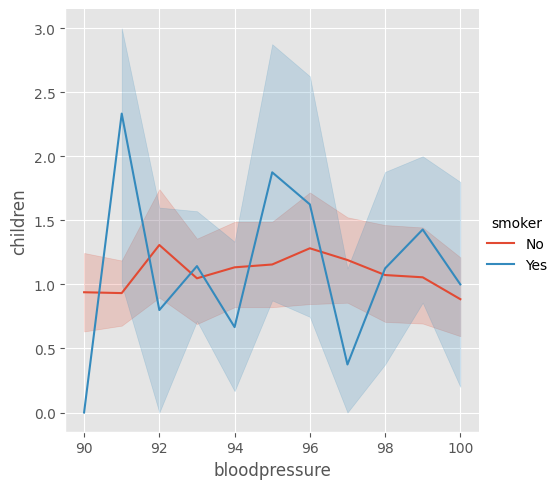

In [26]:
sns.relplot(kind='line', data=temp_df, x = 'bloodpressure', y = 'children', hue='smoker')
plt.show()

### **`Q-6:`** Draw a histogram using displot

- based on "age" column.
- Show details of "smoker" (hue).
- Create 2 separate charts for the above 2 conditions based on "gender" side-by-side.

In [34]:
patient.sample(5)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
946,946,947,20.0,male,33.1,99,No,3,No,southeast,13919.82
789,789,790,49.0,male,36.6,84,No,3,No,southwest,11264.54
428,428,429,34.0,female,30.7,90,No,1,No,southeast,5976.83
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
1055,1055,1056,25.0,female,22.2,100,Yes,2,Yes,southeast,19444.27


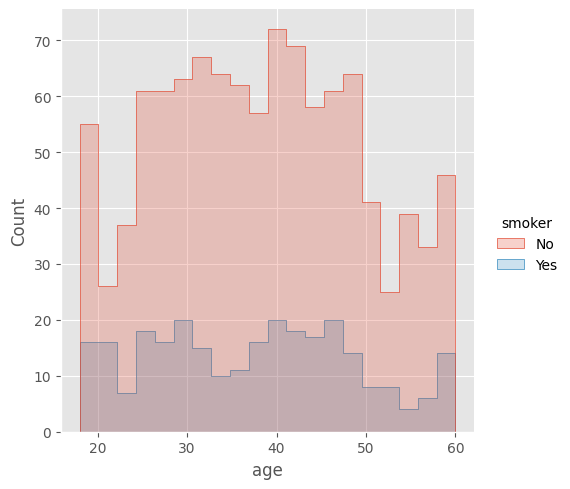

In [38]:
sns.displot(kind='hist', data=patient, x = 'age', bins = 20, hue='smoker', element = 'step')
plt.show()

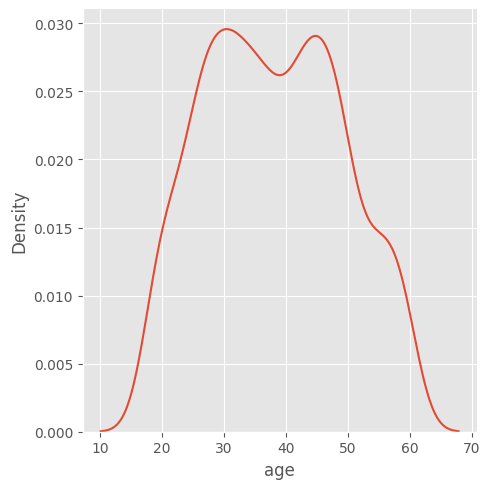

In [32]:
sns.displot(kind='kde', data=patient, x = 'age')
plt.show()

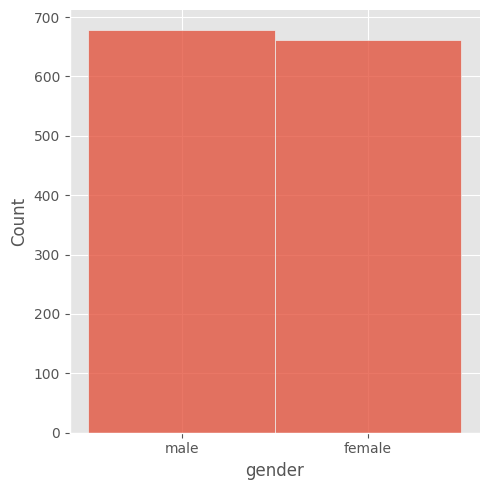

In [41]:
sns.displot(kind='hist', data=patient, x = 'gender')
plt.show()

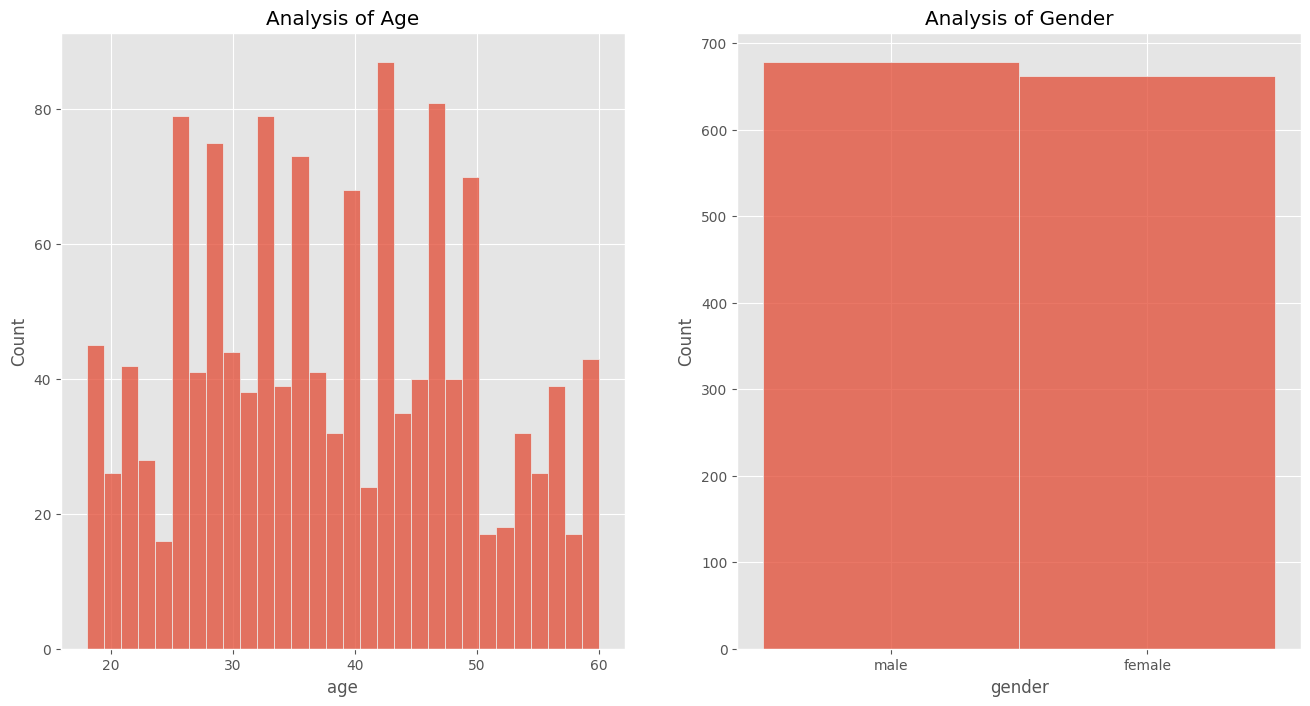

In [51]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# sns.displot(kind='hist', data=patient, x = 'age', ax = axes[0]) 
sns.histplot(data=patient, x = 'age', ax = axes[0], bins=30)
axes[0].set_title('Analysis of Age')

sns.histplot(data=patient, x = 'gender', ax = axes[1])
axes[1].set_title('Analysis of Gender')


plt.show()

### **`Q-7:`** Draw a kde plot between "age" and "bloodpressure".

In [52]:
patient.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


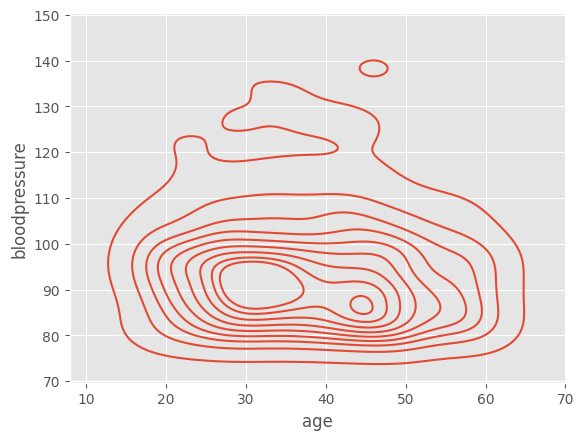

In [58]:
# sns.displot(kind='hist', data='age', x = 'age') 
sns.kdeplot(data=patient, x = 'age', y = 'bloodpressure')
plt.show()

### **`Q-8:`** Draw a clustermap between between "age", "bmi" and "bloodpressure".

In [59]:
patient.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [67]:
patient.shape

(1340, 11)

In [72]:
patient.iloc[ : , [2, 4, 5]]

,age,bmi,bloodpressure
0,39.0,23.2,91
1,24.0,30.1,87
2,NaN,33.3,82
3,NaN,33.7,80
4,NaN,34.1,100
...,...,...,...
1335,44.0,35.5,88
1336,59.0,38.1,120
1337,30.0,34.5,91
1338,37.0,30.4,106


In [75]:
subset = patient.iloc[:, [2, 4, 5]]
print(subset.isna().sum())  # NaNs
print((subset == np.inf).sum())  # +infinity
print((subset == -np.inf).sum())  # -infinity

age              5
bmi              0
bloodpressure    0
dtype: int64
age              0
bmi              0
bloodpressure    0
dtype: int64
age              0
bmi              0
bloodpressure    0
dtype: int64


In [81]:
# Safely create a copy of the slice
subset = patient.iloc[:, [2, 4, 5]].copy()

# Replace infinite values with NaN
subset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values
subset_cleaned = subset.dropna()

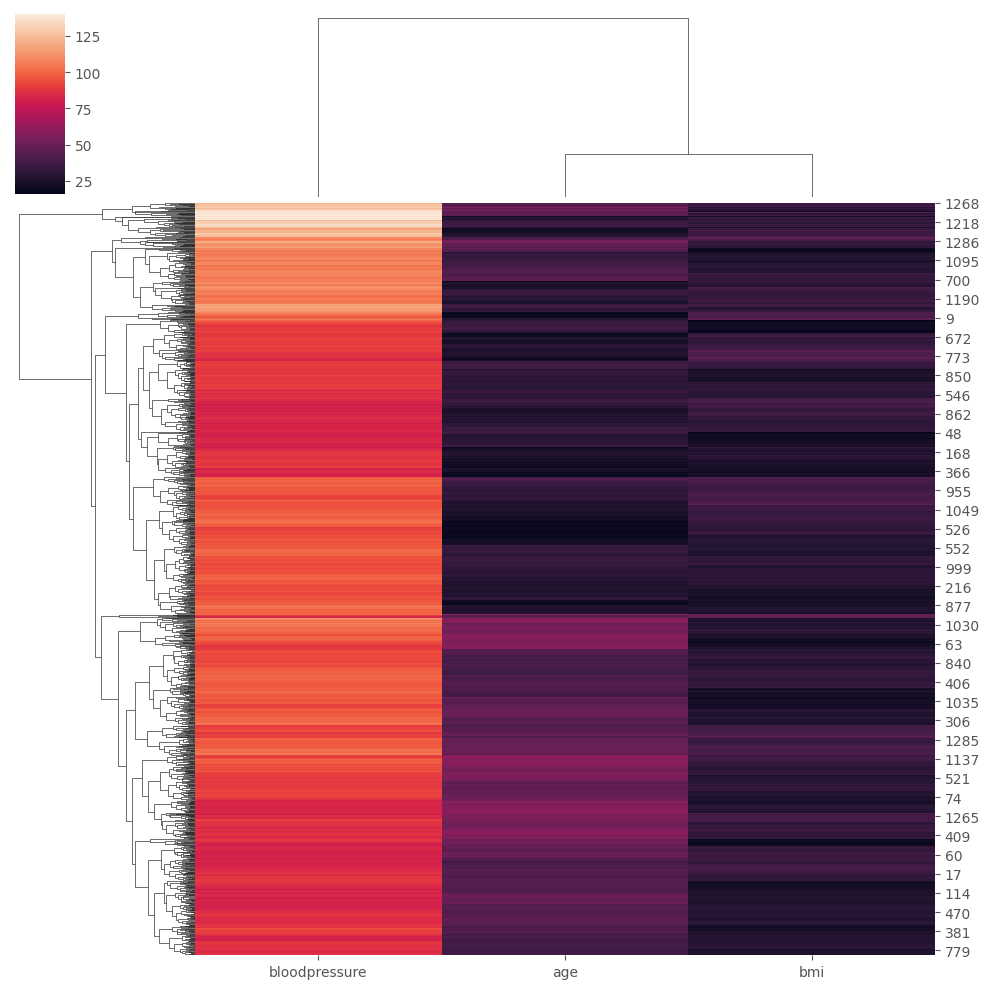

In [82]:
sns.clustermap(subset_cleaned)